In [7]:
import pandas as pd

# Q1
# a) Read the csv file (Bank.csv in Canvas) as Pandas DataFrame

url = 'https://github.com/lc0312/COSC502/blob/main/Bank.csv?raw=true'
bank_df = pd.read_csv(url)

In [8]:
# b) Consider the ‘Personal Loan’ as class (Y) variable and all other columns (Ignore the ID and Zipcode columns) as X variable.

Y_data = bank_df['Personal Loan']
X_data = bank_df.drop(['ID','ZIP Code','Personal Loan'], axis=1)

In [9]:
# c) Create a training (70%) and test set (30%) from the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

In [10]:
# d) Classify the above dataset by using the K-NN algorithms and compare the performances (using both the Euclidean and Manhattan distance measures).
from sklearn.neighbors import KNeighborsClassifier

knn_M = KNeighborsClassifier(p=1)
knn_M.fit (X_train, Y_train)

print ('Manhattan:', knn_M.score (X_test, Y_test))

knn_E = KNeighborsClassifier(p=2)
knn_E.fit (X_train, Y_train)

print ('Euclidean:', knn_E.score (X_test, Y_test))

Manhattan: 0.92
Euclidean: 0.9053333333333333


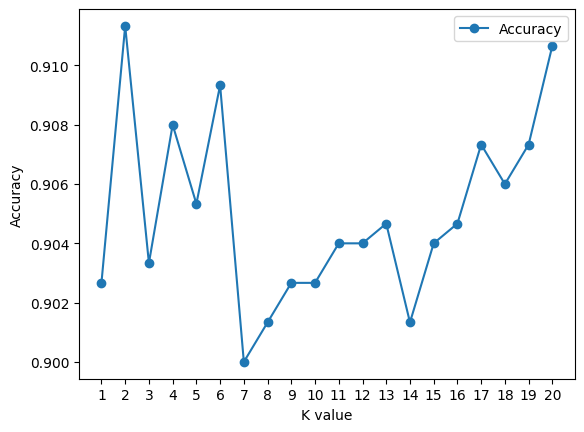

In [11]:
# e) For K-NN classification, fit and test the model for different values for K (from 1 to 20) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).
import matplotlib.pyplot as plt
import numpy as np


scores_knn = []
x_number = np.arange (1,21,1)

for n_number in range (20):
    knn = KNeighborsClassifier(n_neighbors=n_number+1)
    knn.fit (X_train, Y_train)
    scores_knn.append (knn.score(X_test, Y_test))

y_number = np.array (scores_knn)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('K value')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()

In [12]:
# f) Compare the performances (test accuracies and confusion matrices) of Logistic Regression (in HW4) and KNN classifiers and show the result.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Accuracy and F1 score: \n', classification_report (knn_E.predict(X_test), Y_test))

print ('Confuison matrix: \n', confusion_matrix (knn_E.predict(X_test), Y_test),'\n')


print ('Compare with hw4:')
from IPython import display
#display.Image('D:\hw4_score.png')

Accuracy and F1 score: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1408
           1       0.33      0.54      0.41        92

    accuracy                           0.91      1500
   macro avg       0.65      0.74      0.68      1500
weighted avg       0.93      0.91      0.92      1500

Confuison matrix: 
 [[1308  100]
 [  42   50]] 

Compare with hw4:


In [13]:
#Q2
# a) Read the data set as Pandas Dataframe object and consider the columns: Gender, Married, Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area as feature input (X) and Loan_Status as Label output (Y)
url = 'https://github.com/lc0312/COSC502/blob/main/Customer.csv?raw=true'
Customer_df = pd.read_csv(url)

output_data = Customer_df['Loan_Status']
input_data = Customer_df[['Gender', 'Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [14]:
# b) Perform the necessary conversion (Label encoding and may be feature scaling) of appropriate features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#input_data = pd.get_dummies(data=input_data, columns=['Gender', 'Married', 'Education', 'Property_Area'])

for col in ('Gender', 'Married', 'Education', 'Property_Area'):
    input_data[col] = le.fit_transform(input_data[col])

print ('For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet') 

input_data = input_data.fillna(method="ffill")

For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet


/tmp/ipykernel_6184/2066554598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
/tmp/ipykernel_6184/2066554598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
/tmp/ipykernel_6184/2066554598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [15]:
# c) Classify the data set (20% test, 80% training) using Decision Tree and Random Forest classifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split (input_data, output_data, test_size=0.2)

dt = tree.DecisionTreeClassifier()
dt.fit (X_train, Y_train)


rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(input_data, output_data)


RandomForestClassifier(max_depth=2, random_state=0)

Decision Tree
First tree
Last two


[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.387\nsamples = 241\nvalue = [100, 281]'),
 Text(0.25, 0.5, 'x[4] <= 2027.5\ngini = 0.215\nsamples = 35\nvalue = [50, 7]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.091\nsamples = 25\nvalue = [40, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 10\nvalue = [10, 5]'),
 Text(0.75, 0.5, 'x[4] <= 1444.5\ngini = 0.261\nsamples = 206\nvalue = [50, 274]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.341\nsamples = 120\nvalue = [41, 147]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.124\nsamples = 86\nvalue = [9, 127]')]

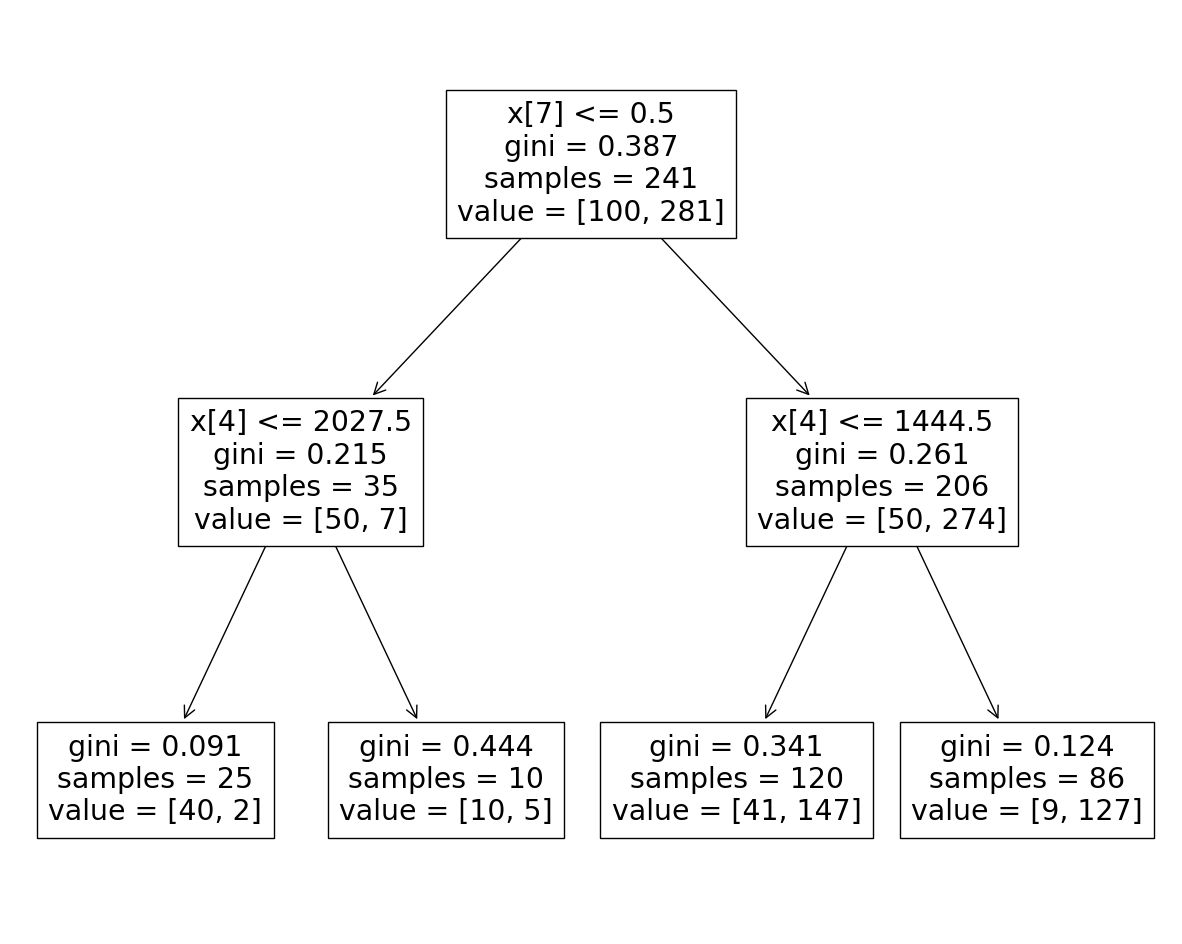

In [21]:
# d) For the Decision Tree algorithm generate the tree and show/save it as an image file. Show the first and last two decision trees generated by your Random Forest classifier.
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,12))
print ('Decision Tree')
tree.plot_tree(dt)

#fig.savefig('tree.png',format='png')

print ('First tree')
plot_tree(rf.estimators_[0])

print ('Last two')
plot_tree(rf.estimators_[99])
